In [1]:
%cd /kaggle/working

import os

from hydra import compose, initialize
from omegaconf import OmegaConf

with initialize(version_base=None, config_path="../experiments/032_feature_channel"):
    cfg = compose(
        config_name="config.yaml", overrides=["debug=True"], return_hydra_config=True
    )

/kaggle/working


In [12]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)

polars.config.Config

In [3]:
df = pl.read_parquet("input/train.parquet", n_rows=10000)

In [13]:
# T について

tmp = df

t_array = tmp[:, 1:61].to_numpy()
dt_array = np.abs(tmp[:, 557 : 557 + 60].to_numpy() * 1200)
nt_array = t_array + dt_array

df_array_rate = dt_array / (np.maximum(t_array, nt_array) + 1e-60)

tmp = pd.DataFrame(df_array_rate, columns=tmp.columns[1:61])

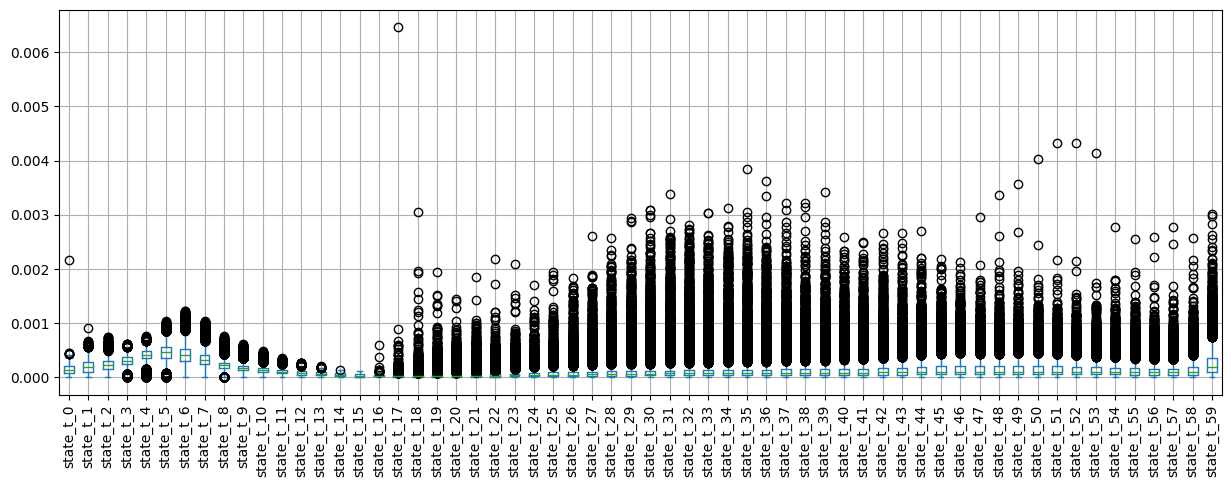

In [15]:
tmp.plot(kind="box", figsize=(15, 5))
plt.xticks(rotation=90)
plt.grid()
plt.show()